In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
import sklearn as sk
import random

sgs1 ="4932.YMR190C"

In [2]:
def graph_info(G0):
    # contains_SGS1 = None
    # contains_SGS1 = G0[sgs1] is not None
    print("Nodes:", G0.number_of_nodes(), "Edges:", G0.number_of_edges(), "Connected:", nx.connected.is_connected(G0), "Subgrahs:", nx.connected.number_connected_components(G0))#, "Contains SGS1:", contains_SGS1, "SGS1 degree:", G0.degree(sgs1))

In [3]:
def random_sample_subsets(G, N,threshold_val = 500, edge_removal_fraction=0.75):

    # if edge weight is less than thresh remove edge
    for edge in G.edges():
        weight = list(G.get_edge_data(edge[0],edge[1]).values())
        if(weight[0]<= threshold_val):
            G.remove_edge(edge[0],edge[1])
    
    subsets = []
    for _ in range(N):
        # copy of G to make a subset from
        H = G.copy()
        
        # number of edges to remove
        num_edges_to_remove = int(edge_removal_fraction * G.number_of_edges())
        
        # random selection of edges to remove
        edges = list(G.edges())
        edges_to_remove = random.sample(edges, num_edges_to_remove)
        
        # remove edges from H
        H.remove_edges_from(edges_to_remove)

        H = H.subgraph(max(nx.connected_components(H),key=len))
        
        subsets.append(H)
    
    return subsets

def evenly_split_from_tot_subsets(G, N, threshold_val=500):
    # if edge weight is less than thresh remove edge
    for edge in list(G.edges()):
        weight = list(G.get_edge_data(edge[0], edge[1]).values())
        if weight[0] <= threshold_val:
            G.remove_edge(edge[0], edge[1])

    # all edges in G
    all_edges = list(G.edges())

    # random ordering of edges
    random.shuffle(all_edges)

    # split into N subsets
    edge_subsets = [all_edges[i::N] for i in range(N)]

    # make subsets
    subsets = []
    for edges in edge_subsets:
        # add edges to new graph
        H = nx.Graph()
        H.add_edges_from(edges)

        # add all nodes into new graph
        H.add_nodes_from(G.nodes())

        # grab largest subgraph
        H = H.subgraph(max(nx.connected_components(H), key=len))

        subsets.append(H)

    return subsets

In [4]:
G0 = nx.read_weighted_edgelist("4932.protein.links.v12.0.txt", comments="#", nodetype=str)
graph_info(G0)

Nodes: 6538 Edges: 1412421 Connected: True Subgrahs: 1


In [5]:
full_set = random_sample_subsets(G0,1,threshold_val=500, edge_removal_fraction=0)
check_node_in_subsets(full_set)

NameError: name 'check_node_in_subsets' is not defined

Option 1: randomly grab some fraction of edges and then make N new graphs from that

In [6]:
subsets = random_sample_subsets(G0,20,threshold_val=500, edge_removal_fraction=0.75)

In [7]:
for subset in subsets:
    graph_info(subset)

Nodes: 5863 Edges: 47405 Connected: True Subgrahs: 1
Nodes: 5845 Edges: 47412 Connected: True Subgrahs: 1
Nodes: 5860 Edges: 47417 Connected: True Subgrahs: 1
Nodes: 5855 Edges: 47414 Connected: True Subgrahs: 1
Nodes: 5848 Edges: 47411 Connected: True Subgrahs: 1
Nodes: 5844 Edges: 47407 Connected: True Subgrahs: 1
Nodes: 5873 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5863 Edges: 47409 Connected: True Subgrahs: 1
Nodes: 5850 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5860 Edges: 47405 Connected: True Subgrahs: 1
Nodes: 5866 Edges: 47408 Connected: True Subgrahs: 1
Nodes: 5837 Edges: 47410 Connected: True Subgrahs: 1
Nodes: 5840 Edges: 47408 Connected: True Subgrahs: 1
Nodes: 5839 Edges: 47407 Connected: True Subgrahs: 1
Nodes: 5863 Edges: 47404 Connected: True Subgrahs: 1
Nodes: 5848 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5869 Edges: 47405 Connected: True Subgrahs: 1
Nodes: 5872 Edges: 47407 Connected: True Subgrahs: 1
Nodes: 5839 Edges: 47404 Connected: True Subgr

Option 2: take all the edges split them evenly into N subsets, no duplicates

In [47]:
subsets = evenly_split_from_tot_subsets(G0,4,threshold_val=500)

In [48]:
for subset in subsets:
    graph_info(subset)

Nodes: 3958 Edges: 19464 Connected: True Subgrahs: 1
Nodes: 3934 Edges: 19477 Connected: True Subgrahs: 1
Nodes: 4001 Edges: 19438 Connected: True Subgrahs: 1
Nodes: 3979 Edges: 19484 Connected: True Subgrahs: 1


Processing subset 1
k value: 5
k value: 6
k value: 7
k value: 8
k value: 9
k value: 10
k value: 11
k value: 12
k value: 13
k value: 14
Processing subset 2
k value: 5
k value: 6
k value: 7
k value: 8
k value: 9
k value: 10
k value: 11
k value: 12
k value: 13
k value: 14
Processing subset 3
k value: 5
k value: 6
k value: 7
k value: 8
k value: 9
k value: 10
k value: 11
k value: 12
k value: 13
k value: 14
Processing subset 4
k value: 5
k value: 6
k value: 7
k value: 8
k value: 9
k value: 10
k value: 11
k value: 12
k value: 13
k value: 14
Subset 1 metrics:
k_values: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
num_communities: [286, 11, 0, 0, 0, 0, 0, 0, 0, 0]
Subset 2 metrics:
k_values: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
num_communities: [255, 21, 0, 0, 0, 0, 0, 0, 0, 0]
Subset 3 metrics:
k_values: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
num_communities: [267, 6, 0, 0, 0, 0, 0, 0, 0, 0]
Subset 4 metrics:
k_values: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
num_communities: [233, 25, 0, 0, 0, 0, 0, 0, 0, 0]


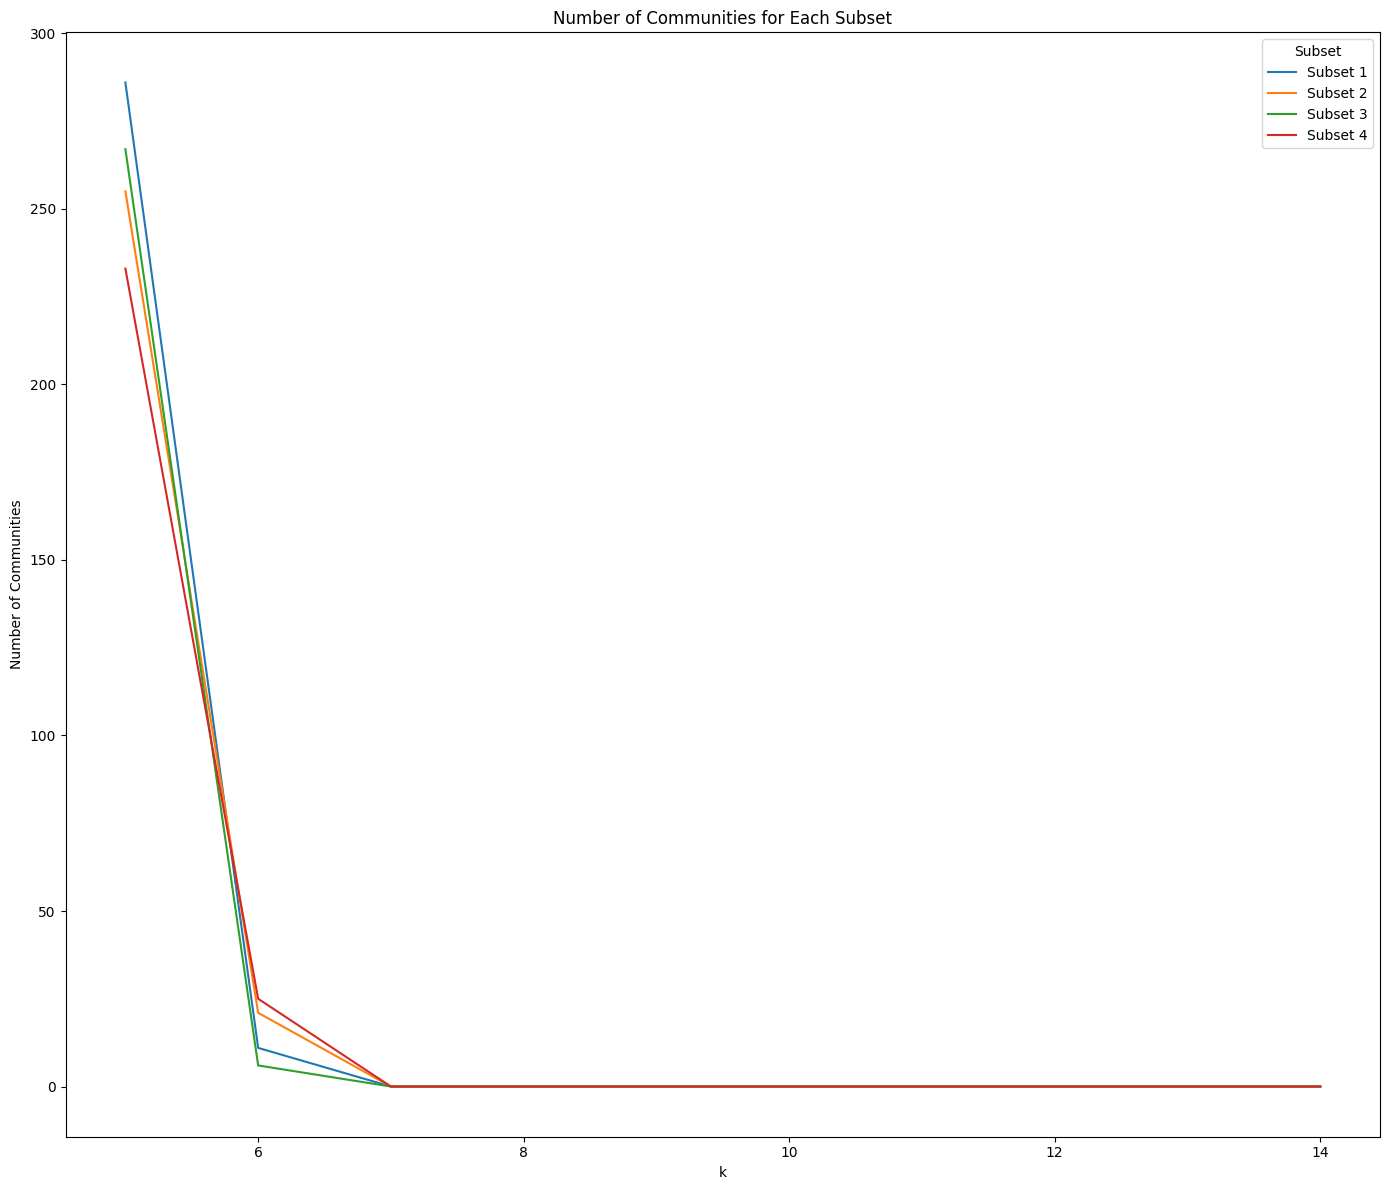

In [49]:

def calculate_metrics(G, communities, k):
    num_communities = len(communities)
    
    if num_communities == 0:
        return {
            'k': k,
            'num_communities': 0,
        }
    

    return {
        'k': k,
        'num_communities': num_communities,

    }

k_values = range(5, 15)
subset_metrics = []

# Process each subset and each k-value
for i, subset in enumerate(subsets, start=1):
    print(f"Processing subset {i}")
    
    subset_k_values = []
    subset_num_communities = []
    subset_avg_size = []
    
    for k in k_values:
        print(f"k value: {k}")
        try:
            # Detect communities using k-clique
            communities = list(k_clique_communities(subset, k))
            
            # Calculate metrics
            result = calculate_metrics(subset, communities, k)
            subset_k_values.append(result['k'])
            subset_num_communities.append(result['num_communities'])
        
        except Exception as e:
            print(f"Error processing k={k}: {e}")
    
    # Store metrics for this subset
    subset_metrics.append({
        'subset': i,
        'k_values': subset_k_values,
        'num_communities': subset_num_communities,
    })

# Check collected metrics
for metrics in subset_metrics:
    print(f"Subset {metrics['subset']} metrics:")
    print(f"k_values: {metrics['k_values']}")
    print(f"num_communities: {metrics['num_communities']}")

# Plotting
plt.figure(figsize=(14, 12))

# Plot number of communities
for metrics in subset_metrics:
    plt.plot(metrics['k_values'], metrics['num_communities'], label=f'Subset {metrics["subset"]}')
plt.title('Number of Communities for Each Subset')
plt.xlabel('k')
plt.ylabel('Number of Communities')
plt.legend(title='Subset')
plt.tight_layout()
plt.show()

In [11]:
k = 5

for subset in subsets:
        
    communities = k_clique_communities(subset, k)

    centrality_measures = {}

    for i, community in enumerate(communities):
        subgraph = subset.subgraph(community)  # Subgraph for each community

        # Calculate centralities
        degree_centrality = nx.degree_centrality(subgraph)
        betweenness_centrality = nx.betweenness_centrality(subgraph)
        closeness_centrality = nx.closeness_centrality(subgraph)
        eigenvector_centrality = nx.eigenvector_centrality(subgraph)
        pagerank_centrality = nx.pagerank(subgraph)
        harmonic_centrality = nx.harmonic_centrality(subgraph)

        # Combine results into a centrality score
        centrality_combined = {
            node: (
                degree_centrality.get(node, 0) +
                betweenness_centrality.get(node, 0) +
                closeness_centrality.get(node, 0) +
                eigenvector_centrality.get(node, 0) +
                pagerank_centrality.get(node, 0) +
                harmonic_centrality.get(node, 0)
            ) for node in subgraph.nodes()
        }

        # Find the most central node (protein) in the community
        most_central_protein = max(centrality_combined, key=centrality_combined.get)

        centrality_measures[i] = {
            "most_central_protein": most_central_protein,
            "degree_centrality": degree_centrality.get(most_central_protein, 0),
            "betweenness_centrality": betweenness_centrality.get(most_central_protein, 0),
            "closeness_centrality": closeness_centrality.get(most_central_protein, 0),
            "eigenvector_centrality": eigenvector_centrality.get(most_central_protein, 0),
            "pagerank_centrality": pagerank_centrality.get(most_central_protein, 0),
            "harmonic_centrality": harmonic_centrality.get(most_central_protein, 0),
        }

    # Output the most central protein for each community
    for community_idx, data in centrality_measures.items():
        print(f"Community {community_idx}:")
        print(f"Most Central Protein: {data['most_central_protein']}")
        print(f"Degree Centrality: {data['degree_centrality']}")
        print(f"Betweenness Centrality: {data['betweenness_centrality']}")
        print(f"Closeness Centrality: {data['closeness_centrality']}")
        print(f"Eigenvector Centrality: {data['eigenvector_centrality']}")
        print(f"PageRank Centrality: {data['pagerank_centrality']}")
        print(f"Harmonic Centrality: {data['harmonic_centrality']}")
        print()

Community 0:
Most Central Protein: 4932.YEL034W
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0
Eigenvector Centrality: 0.447213595499958
PageRank Centrality: 0.2
Harmonic Centrality: 4.0

Community 1:
Most Central Protein: 4932.YNL096C
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0
Eigenvector Centrality: 0.447213595499958
PageRank Centrality: 0.2
Harmonic Centrality: 4.0

Community 2:
Most Central Protein: 4932.YNL301C
Degree Centrality: 1.0
Betweenness Centrality: 0.025
Closeness Centrality: 1.0
Eigenvector Centrality: 0.428444983589111
PageRank Centrality: 0.17723888017477246
Harmonic Centrality: 5.0

Community 3:
Most Central Protein: 4932.YNL061W
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness Centrality: 1.0
Eigenvector Centrality: 0.447213595499958
PageRank Centrality: 0.2
Harmonic Centrality: 4.0

Community 4:
Most Central Protein: 4932.YOL031C
Degree Centrality: 1.0
Betweenness Centrality: 0.0
Closeness C

In [12]:
def centrality_consistency_experiment(subsets, k=5, important_node="4932.YMR190C"):
    # Initialize centrality measures to be calculated
    centrality_scores = {
        "degree": [],
        "betweenness": [],
        "closeness": [],
        "eigenvector": [],
        "pagerank": [],
        "harmonic": [],
        "katz": [],
        "load": [],
        "information": [],
        "current_flow_closeness": [],
        "current_flow_betweenness": []
    }
    
    # Track centrality measures where the important node is found in any community of each subset
    measures_with_important_node = {
        "degree": set(),
        "betweenness": set(),
        "closeness": set(),
        "eigenvector": set(),
        "pagerank": set(),
        "harmonic": set(),
        "katz": set(),
        "load": set(),
        "information": set(),
        "current_flow_closeness": set(),
        "current_flow_betweenness": set()
    }

    # For each subset, find communities and calculate centralities for all nodes
    for subset in subsets:
        communities = list(k_clique_communities(subset, k))

        for i, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Calculate various centralities for all nodes in this community
            degree_centrality = nx.degree_centrality(subgraph)
            betweenness_centrality = nx.betweenness_centrality(subgraph)
            closeness_centrality = nx.closeness_centrality(subgraph)
            eigenvector_centrality = nx.eigenvector_centrality(subgraph)
            pagerank_centrality = nx.pagerank(subgraph)
            harmonic_centrality = nx.harmonic_centrality(subgraph)
            katz_centrality = nx.katz_centrality_numpy(subgraph)  # using numpy-based Katz centrality
            load_centrality = nx.load_centrality(subgraph)
            information_centrality = nx.information_centrality(subgraph)
            current_flow_closeness = nx.current_flow_closeness_centrality(subgraph)
            current_flow_betweenness = nx.current_flow_betweenness_centrality(subgraph)

            # Check if important_node is the most central node in this community for any measure
            all_measures = {
                "degree": degree_centrality,
                "betweenness": betweenness_centrality,
                "closeness": closeness_centrality,
                "eigenvector": eigenvector_centrality,
                "pagerank": pagerank_centrality,
                "harmonic": harmonic_centrality,
                "katz": katz_centrality,
                "load": load_centrality,
                "information": information_centrality,
                "current_flow_closeness": current_flow_closeness,
                "current_flow_betweenness": current_flow_betweenness
            }
            
            for measure_name, centrality in all_measures.items():
                if important_node in centrality:
                    if centrality[important_node] == max(centrality.values()):
                        measures_with_important_node[measure_name].add(subset)

        # Collect centrality scores for each node in the community, but only for measures where the important node was found
        for node in subset.nodes():
            if "degree" in measures_with_important_node:
                centrality_scores["degree"].append(degree_centrality.get(node, 0))
            if "betweenness" in measures_with_important_node:
                centrality_scores["betweenness"].append(betweenness_centrality.get(node, 0))
            if "closeness" in measures_with_important_node:
                centrality_scores["closeness"].append(closeness_centrality.get(node, 0))
            if "eigenvector" in measures_with_important_node:
                centrality_scores["eigenvector"].append(eigenvector_centrality.get(node, 0))
            if "pagerank" in measures_with_important_node:
                centrality_scores["pagerank"].append(pagerank_centrality.get(node, 0))
            if "harmonic" in measures_with_important_node:
                centrality_scores["harmonic"].append(harmonic_centrality.get(node, 0))
            if "katz" in measures_with_important_node:
                centrality_scores["katz"].append(katz_centrality.get(node, 0))
            if "load" in measures_with_important_node:
                centrality_scores["load"].append(load_centrality.get(node, 0))
            if "information" in measures_with_important_node:
                centrality_scores["information"].append(information_centrality.get(node, 0))
            if "current_flow_closeness" in measures_with_important_node:
                centrality_scores["current_flow_closeness"].append(current_flow_closeness.get(node, 0))
            if "current_flow_betweenness" in measures_with_important_node:
                centrality_scores["current_flow_betweenness"].append(current_flow_betweenness.get(node, 0))

    # Calculate consistency: standard deviation or variance across subsets for each centrality measure
    consistency = {measure: np.var(scores) for measure, scores in centrality_scores.items() if scores}

    # Output results
    print("Centrality Consistency (Lower variance is better):")
    for measure, variance in consistency.items():
        print(f"{measure.capitalize()} Centrality Variance: {variance:.4f}")

    # Determine the most consistent centrality measure (lowest variance)
    most_consistent = min(consistency, key=consistency.get) if consistency else "None"
    print(f"\nMost Consistent Centrality Measure: {most_consistent.capitalize()}")


In [6]:
def centrality_consistency_experiment(subsets, k=5, important_node="4932.YMR190C"):
    # Initialize centrality scores
    centrality_scores = {
        "degree": [],
        "betweenness": []
    }
    
    # Track where the important node is found
    measures_with_important_node = {
        "degree": set(),
        "betweenness": set()
    }

    # For each subset, find communities and calculate centralities
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(k_clique_communities(subset, k))

        for community_idx, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Check if important_node is in the community
            if important_node in subgraph.nodes():
                print(f"  Community {community_idx}: Contains {important_node}")

                try:
                    # Calculate centralities
                    degree_centrality = nx.degree_centrality(subgraph)
                    betweenness_centrality = nx.betweenness_centrality(subgraph)

                    # Check if important_node is the most central node in this community for any measure
                    all_measures = {
                        "degree": degree_centrality,
                        "betweenness": betweenness_centrality
                    }
                    
                    for measure_name, centrality in all_measures.items():
                        if important_node in centrality:
                            if centrality[important_node] == max(centrality.values()):
                                measures_with_important_node[measure_name].add(subset_idx)
                    
                    # Collect centrality scores for nodes in the subset
                    for node in subset.nodes():
                        if "degree" in measures_with_important_node:
                            centrality_scores["degree"].append(degree_centrality.get(node, 0))
                        if "betweenness" in measures_with_important_node:
                            centrality_scores["betweenness"].append(betweenness_centrality.get(node, 0))

                except Exception as e:
                    print(f"  Error calculating centrality measures: {e}")

    # Calculate consistency: standard deviation across subsets for each centrality measure
    consistency = {measure: np.var(scores) for measure, scores in centrality_scores.items() if scores}

    # Output results
    print("Centrality Consistency (Lower variance is better):")
    for measure, variance in consistency.items():
        print(f"{measure.capitalize()} Centrality Variance: {variance:.4f}")

    # Determine the most consistent centrality measure (lowest variance)
    most_consistent = min(consistency, key=consistency.get) if consistency else "None"
    print(f"\nMost Consistent Centrality Measure: {most_consistent.capitalize()}")

    # Print measures where the important node was found
    print("\nCentrality Measures with Important Node Found in Any Community:")
    for measure, subsets in measures_with_important_node.items():
        if subsets:
            print(f"{measure.capitalize()}: Found in {len(subsets)} subsets")

def check_node_in_subsets(subsets, important_node="4932.YMR190C"):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nNodes in Subset {subset_idx + 1}:")
        nodes = list(subset.nodes())
        
        # Check if the important node exists and print its degree
        important_node_degree = None
        if important_node in nodes:
            important_node_degree = subset.degree[important_node]
            print(f"  {important_node} is in this subset with degree {important_node_degree}.")
        else:
            print(f"  {important_node} is NOT in this subset.")
        
        # Get the degrees of all nodes in the subset
        degrees = [degree for _, degree in subset.degree()]
        min_degree, max_degree = min(degrees), max(degrees)
        
        # Create the histogram
        hist, bins = np.histogram(degrees, bins=range(min_degree, max_degree + 2))

        # Plot the degree distribution
        plt.figure(figsize=(8, 6))
        for i in range(len(hist)):
            if important_node_degree is not None and bins[i] <= important_node_degree < bins[i + 1]:
                # Highlight the bin containing the important node's degree
                plt.bar(bins[i], hist[i], width=1, color='red', label=f'Degree {important_node_degree} (important node)')
            else:
                # Default color for other bins
                plt.bar(bins[i], hist[i], width=1, color='blue')
        
        # Add labels and title
        plt.title(f'Degree Distribution for Subset {subset_idx + 1}')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Add a legend if the important node was found
        if important_node_degree is not None:
            plt.legend()
        
        # Show the plot
        plt.show()

def print_communities(subsets, k=5):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(k_clique_communities(subset, k))
        print(f"  Number of communities: {len(communities)}")
        for community_idx, community in enumerate(communities):
            print(f"  Community {community_idx}: {community}")
def check_important_node_in_communities(subsets, k=5, important_node="4932.YMR190C"):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(k_clique_communities(subset, k))
        
        for community_idx, community in enumerate(communities):
            subgraph = subset.subgraph(community)
            if important_node in subgraph.nodes():
                print(f"  Community {community_idx}: Contains {important_node}")
            else:
                print(f"  Community {community_idx}: Does not contain {important_node}")



Nodes in Subset 1:
  4932.YMR190C is in this subset with degree 43.


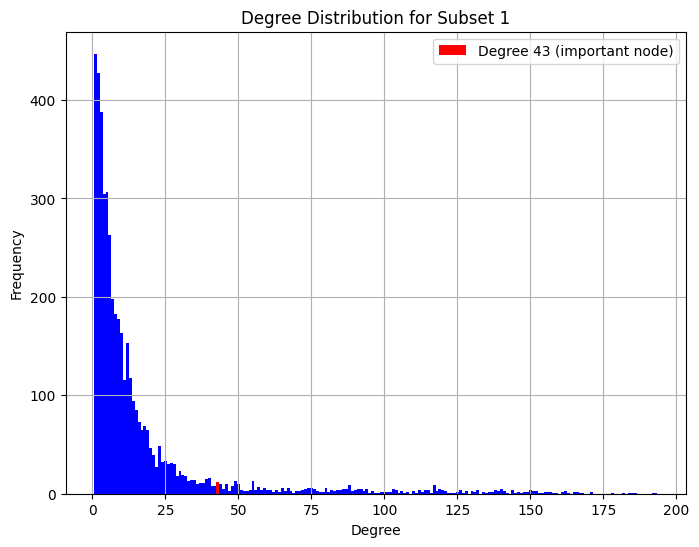


Nodes in Subset 2:
  4932.YMR190C is in this subset with degree 63.


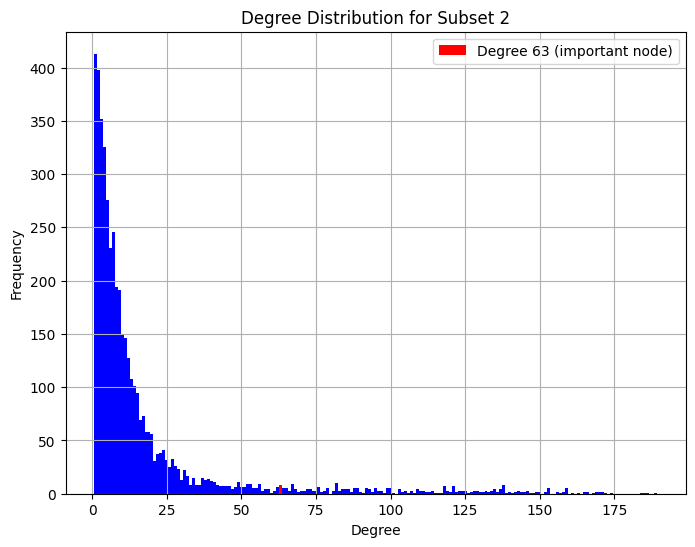


Processing Subset 1...

Processing Subset 2...
Centrality Consistency (Lower variance is better):

Most Consistent Centrality Measure: None

Centrality Measures with Important Node Found in Any Community:


In [45]:
subsets = evenly_split_from_tot_subsets(G0,2,threshold_val=800)


check_node_in_subsets(subsets)
centrality_consistency_experiment(subsets, k=10)

In [50]:
def list_central_nodes(subsets, k=5, important_node="4932.YMR190C"):
    central_nodes_by_community = {}
    count_important_node = 0  # Initialize the count of important_node appearances

    # For each subset, find communities and determine central nodes based on betweenness centrality
    for idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {idx + 1}...")
        communities = list(k_clique_communities(subset, k))
        central_nodes_by_community[idx] = {}

        for i, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Check if important_node is present in the community
            if important_node in subgraph.nodes():
                print(f"  Community {i}: Contains {important_node}")
            else:
                print(f"  Community {i}: Does not contain {important_node}")

            # Calculate betweenness centrality for all nodes in this community
            betweenness_centrality = nx.betweenness_centrality(subgraph)
            
            # Determine the node(s) with the highest betweenness centrality
            if betweenness_centrality:
                most_central_node = max(betweenness_centrality, key=betweenness_centrality.get)
                central_nodes_by_community[idx][i] = most_central_node

                # Print the most central node information
                if important_node in subgraph.nodes():
                    print(f"  Community {i}: Most Central Node (Betweenness Centrality) = {most_central_node}, Contains {important_node}")
                else:
                    print(f"  Community {i}: Most Central Node (Betweenness Centrality) = {most_central_node}")

                # Increment the count if the important_node is the most central node
                if most_central_node == important_node:
                    count_important_node += 1

    return central_nodes_by_community, count_important_node

# Example usage
subsets = evenly_split_from_tot_subsets(G0, 4, threshold_val=500)
central_nodes, count_important_node = list_central_nodes(subsets, k=6, important_node="4932.YMR190C")

# Print results
for subset_idx, communities in central_nodes.items():
    print(f"\nSubset {subset_idx + 1}:")
    for community_idx, node in communities.items():
        print(f"  Community {community_idx}: Most Central Node (Betweenness Centrality) = {node}")

print(f"\n'{sgs1}' appeared as the most central node {count_important_node} times across all communities.")

for subset in subsets:
    contains_SGS1 = None
    contains_SGS1 = subset[sgs1] is not None
    print(contains_SGS1)


Processing Subset 1...
  Community 0: Does not contain 4932.YMR190C
  Community 0: Most Central Node (Betweenness Centrality) = 4932.YPR043W
  Community 1: Does not contain 4932.YMR190C
  Community 1: Most Central Node (Betweenness Centrality) = 4932.YDR337W
  Community 2: Does not contain 4932.YMR190C
  Community 2: Most Central Node (Betweenness Centrality) = 4932.YML026C
  Community 3: Does not contain 4932.YMR190C
  Community 3: Most Central Node (Betweenness Centrality) = 4932.YOL121C
  Community 4: Does not contain 4932.YMR190C
  Community 4: Most Central Node (Betweenness Centrality) = 4932.YNL302C
  Community 5: Does not contain 4932.YMR190C
  Community 5: Most Central Node (Betweenness Centrality) = 4932.YPR043W
  Community 6: Does not contain 4932.YMR190C
  Community 6: Most Central Node (Betweenness Centrality) = 4932.YIL018W
  Community 7: Does not contain 4932.YMR190C
  Community 7: Most Central Node (Betweenness Centrality) = 4932.YNL302C
  Community 8: Does not contain 